In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime


# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\terah\AppData\Local\Temp\ipykernel_19952\535912027.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [12]:
raw_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSgcOEGH5nEzRQ6zFdiDxB0S3xHtZ8BUR039zmtnw5hj7mfycCHrdIr2hcc_WM4uR_NNS0z7Bg2ho_c/pub?gid=0&single=true&output=csv', usecols=['alpha_3', 'stage'], na_filter=False)


legend = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSgcOEGH5nEzRQ6zFdiDxB0S3xHtZ8BUR039zmtnw5hj7mfycCHrdIr2hcc_WM4uR_NNS0z7Bg2ho_c/pub?gid=1702276270&single=true&output=csv', usecols=['code', 'label_fr', 'label_en', 'color'], na_filter=False)
legend = legend[legend.code != ""]
legend

,code,label_fr,label_en,color
0,NA,Inconnu,Unknown,#d3d3d3
1,BARBARIANS,Barbares,Barbarians,#a9a9a9
2,FEUDAL_1,État-nation féodal I,Feudal nation state I,#fcfc9f
3,FEUDAL_2,État-nation féodal II,Feudal nation state II,#f0f05b
4,FEUDAL_3,Pic de puissance féodale,Peak feudal power,#f5e831
5,CIVIL_WARS,Guerres Civiles,Civil Wars,#f57aa7
6,ABSOLUTISM_1,Absolutisme I,Absolutism I,#ffcc80
7,ABSOLUTISM_2,Absolutisme II,Absolutism II,#ffb836
8,IMPERIAL_ABSOLUTISM,Absolutisme Imperial,Imperial absolutism,#ed9f0e
9,ANCIEN_REGIME,Ancien Régime,Ancien Régime,#fa8816


In [13]:
data = raw_data.merge(legend, left_on='stage', right_on='code', how='left')
data = data.drop('code', axis=1)
data[data['alpha_3'] == 'USA']

,alpha_3,stage,label_fr,label_en,color
57,USA,OLIGARCHIC_REPUBLIC_2,République oligarchique II,Oligarchic republic II,#10a310


In [14]:
# Merge with the countries DataFrame
world_merged = world.merge(data, left_on='iso_a3', right_on="alpha_3", how='left')

# Default color for other countries
world_merged['color'].fillna('lightgrey', inplace=True)
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,alpha_3,stage,label_fr,label_en,color
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,NA,Inconnu,Unknown,#d3d3d3
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,NATIONAL_REVOLUTION_6,Révolution nationale : restauration,National revlolution : restoration,#a52fb5
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,lightgrey
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,DEMOCRACY_MATURE,Démocratie parlementaire mature,Mature parliamentary democacry,#3969f7
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,OLIGARCHIC_REPUBLIC_2,République oligarchique II,Oligarchic republic II,#10a310


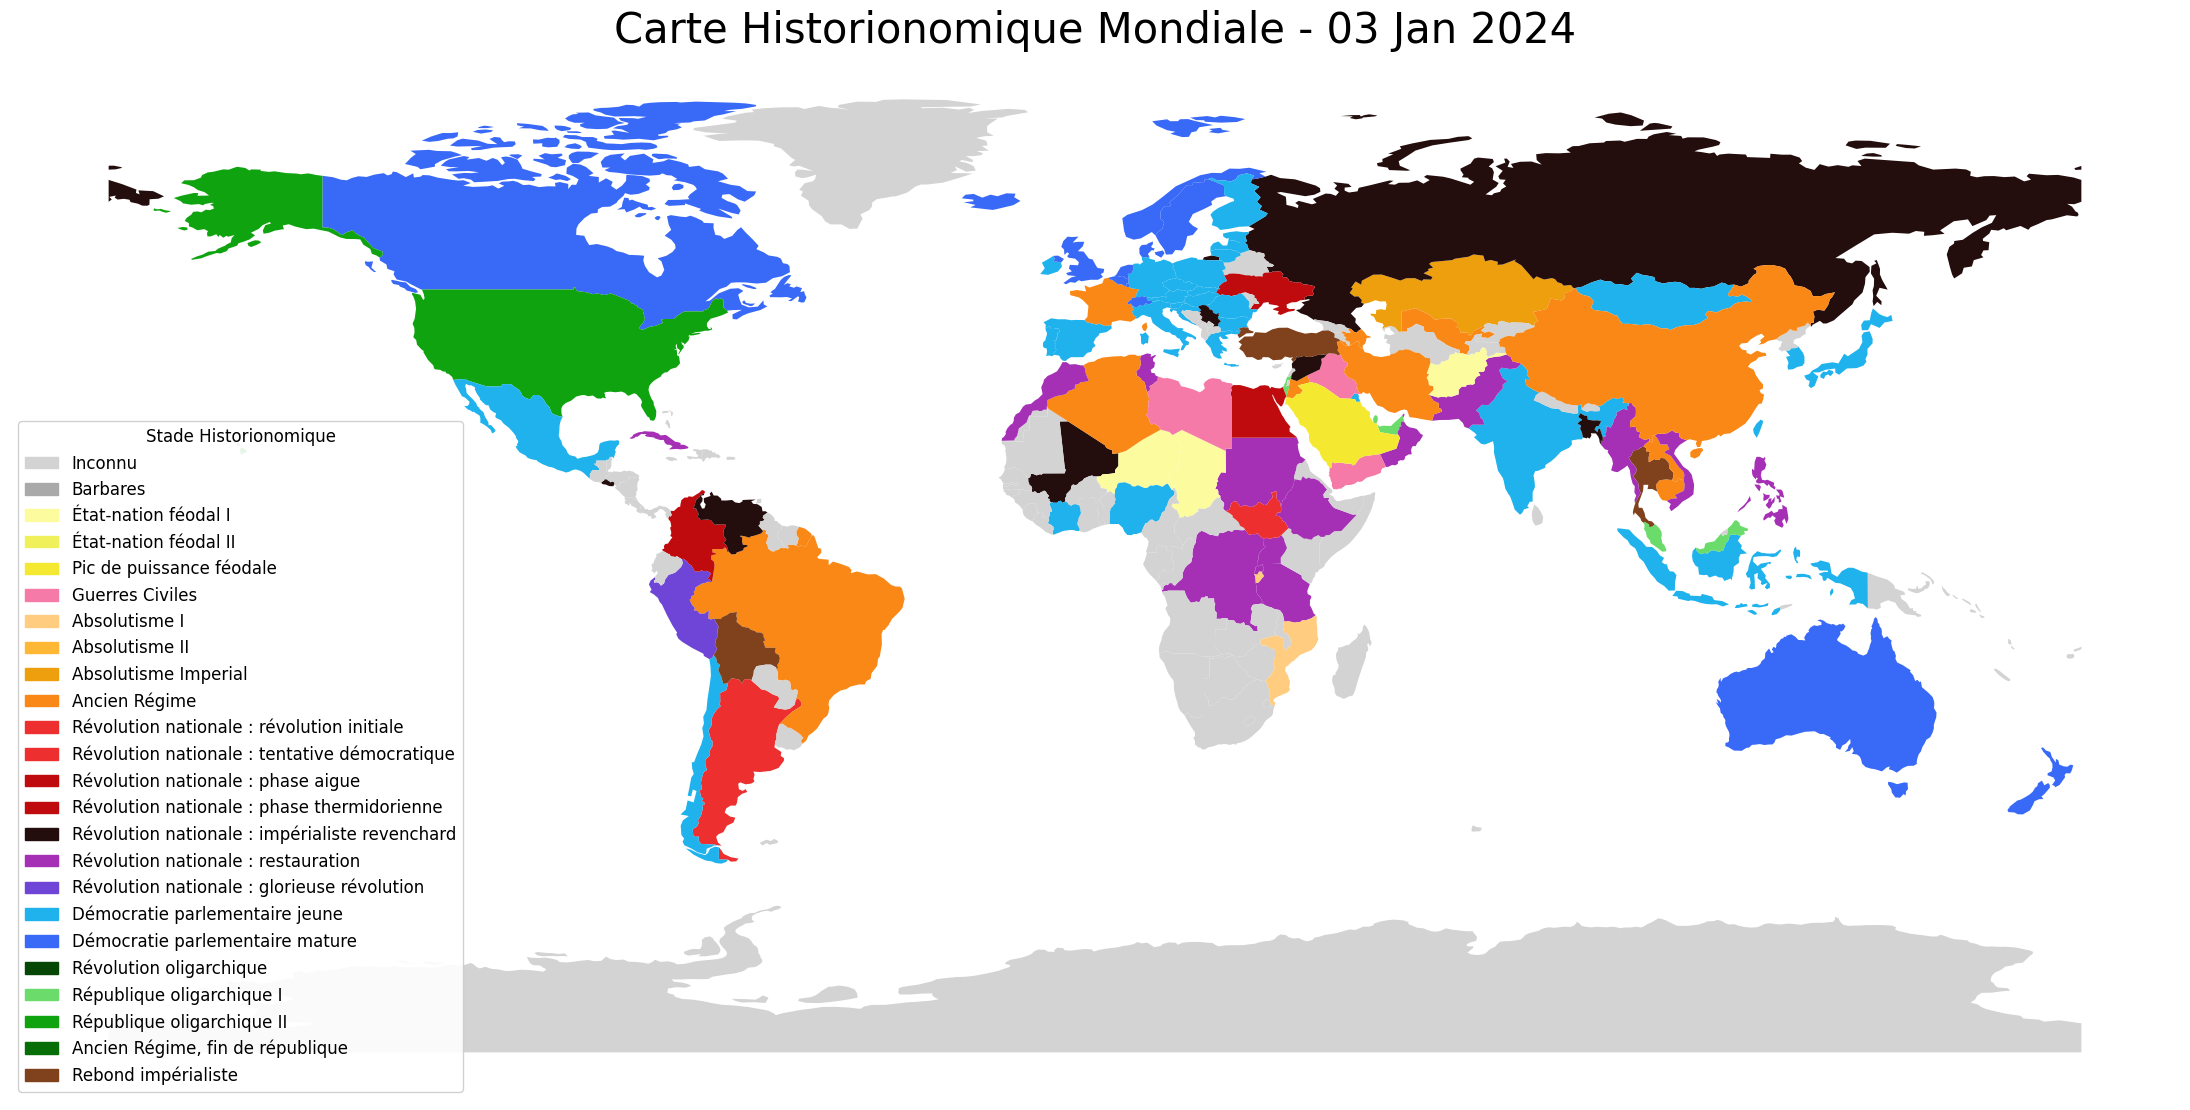

In [15]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(28, 14))
world_merged.plot(color=world_merged['color'], ax=ax)

# Create a list of patches for the legend
patches = [mpatches.Patch(color=l.color, label=l.label_fr) for l in legend.itertuples()]

# Add the legend to the plot
l = ax.legend(handles=patches, loc='lower left',title='Stade Historionomique', fontsize='large', title_fontsize='large')
l.get_frame().set_alpha(0.9)

date = datetime.now().strftime("%d %b %Y")
title = f"Carte Historionomique Mondiale - {date}"

ax.set_title(title, fontsize=30, color='black')
ax.set_axis_off()
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()
